# SEARCH ENGINE FILM DENGAN NLP

Pertama import terlebih dahulu library yang diperlukan untuk proses cleaning data.

In [1]:
import numpy as np
import pandas as pd
import spacy
import string
import gensim
import operator
import re

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Kemudian, import drive agar data bisa diambil dari google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengambil data movies.csv dan menyimpannya pada variabel dengan nama df_film

In [3]:
df_film = pd.read_csv('./drive/My Drive/Colab Notebooks/nlp/UAS/movies.csv')

Melihat data pada df_film

In [4]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


Membuat fungsi untuk proses cleaning data

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS
spacy_nlp = spacy.load('en_core_web_sm')

punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

Proses cleaning data pada variabel atau atribut wiki_plot, kemudian hasilnya disimpan pada wiki_plot_tokenized.

In [6]:
print('Cleaning and Tokenizing....')
%time df_film['wiki_plot_tokenized'] = df_film['wiki_plot'].map(lambda x: spacy_tokenizer(x))

Cleaning and Tokenizing....
CPU times: user 30.1 s, sys: 384 ms, total: 30.5 s
Wall time: 30.5 s


Melihat data pada df_film untuk melihat hasil cleaning data pada atribut wiki_plot

In [7]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wed, vito, corleone, hear, req..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


Pada df_film tersebut dapat dilihat bahwa data pada atribut wiki_plot telah dibersihkan dan disimpan pada variabel baru yang bernama wiki_plot_tokenized, atribut inilah yang akan digunakan sebagai data pada search engine dengan isi plot film sebagai kuncinya

Selanjutnya dilakukan juga proses cleaning (pembersihan data) pada atribut genre.

In [8]:
WORDS = ['u\'','\'']
for words in WORDS:
  df_film.genre = df_film.genre.replace(to_replace=words, value='', regex=True)

df_film['genre']=[entry.lower() for entry in df_film['genre']]

melihat kembali df_film untuk melihat atribut genre yang telah di cleaning sebelumnya.

In [9]:
df_film.head()

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[ crime, drama]","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wed, vito, corleone, hear, req..."
1,1,The Shawshank Redemption,"[ crime, drama]","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[ biography, drama, history]","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[ biography, drama, sport]","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[ drama, romance, war]",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


Sebelumnya sudah dilakukan proses cleaning,  pada bagian ini dilakukan pula proses tokenizing pada data. Selain itu, pada proses cleaning ini pula terjadi perubahan tipe data menjadi series.

In [10]:
print('Cleaning and Tokenizing....')
%time df_film['genre_tokenized'] = df_film['genre'].map(lambda x: spacy_tokenizer(x))

Cleaning and Tokenizing....
CPU times: user 712 ms, sys: 6.61 ms, total: 718 ms
Wall time: 723 ms


Membuat sebuah variabel dengan nama movie_plot yang berisi atribut wiki_plot_tokenized pada df_film. Setelah itu, dilihat isi variabel movie_plot tersebut dari index 0 sampai sampai 4

In [11]:
movie_plot = df_film['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wed, vito, corleone, hear, req...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

Kemudian membuat kembali sebuah variabel dengan nama movie_genre_plot yang berisi atribut genre pada df_film. Setelah itu, dilihat isi variabel movie_genre_plot tersebut dari index 0 sampai sampai 4

In [12]:
movie_genre_plot = df_film['genre_tokenized']
movie_genre_plot[0:5]

0                 [crime, drama]
1                 [crime, drama]
2    [biography, drama, history]
3      [biography, drama, sport]
4          [drama, romance, war]
Name: genre_tokenized, dtype: object

Import library dengan nama wordcloud, library ini berfungsi untuk memetakan daftar kata. Pada bagian ini akan memetakan kata-kata yang sering muncul pada atribut movie_plot.

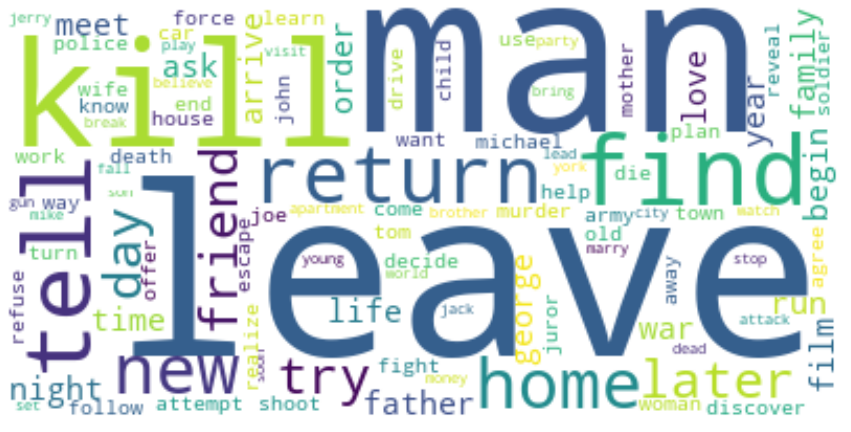

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Kemudian dilakukan pemetakaan kembali pada variabel movie_genre_plot.

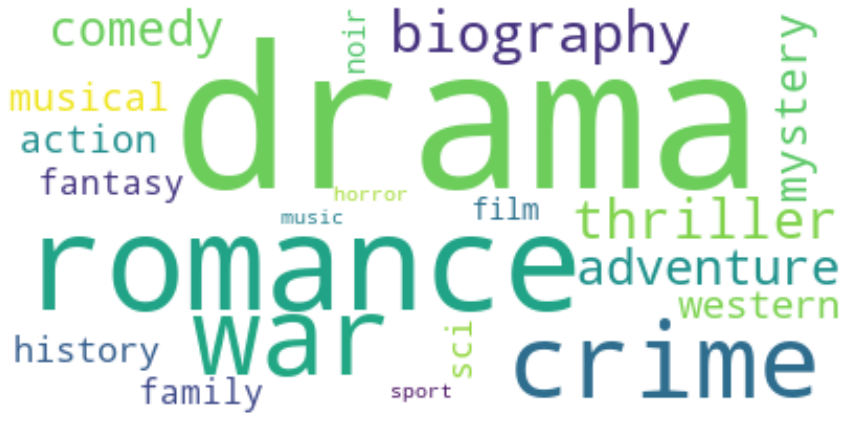

In [14]:
series_genre = pd.Series(np.concatenate(movie_genre_plot)).value_counts()[:100]
wordcloud_genre = WordCloud(background_color='white').generate_from_frequencies(series_genre)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud_genre, interpolation='bilinear')
plt.axis('off')
plt.show()

Membuat dictionary (kamus kata) untuk movie_plot

In [15]:
from gensim import corpora

%time dictionary = corpora.Dictionary(movie_plot)
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 52.7 ms, sys: 860 µs, total: 53.5 ms
Wall time: 59.5 ms


Membuat dictionary (kamus kata) untuk movie_genre_plot

In [16]:
%time dictionary_genre = corpora.Dictionary(movie_genre_plot)
stoplist_genre = set('hello and if this can would should could tell ask stop come go')
stop_ids_genre = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary_genre.token2id]
dictionary_genre.filter_tokens(stop_ids_genre)

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.48 ms


Melihat isi serta frekuensi pada movie_plot yang disimpan pada variabel dict_tokens.

In [17]:
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capos', 39], ['captain', 40], ['car', 41], ['career', 42], ['carlo', 43], ['casino', 44], ['christening', 45], ['christmas', 46], ['clampdown', 47], ['clemenza', 48], ['collapse', 49], ['come', 50]]]


Melihat isi serta frekuensi pada movie_genre_plot yang disimpan pada variabel dict_tokens_genre.

In [18]:
dict_tokens_genre = [[[dictionary_genre[key], dictionary_genre.token2id[dictionary_genre[key]]] for key, value in dictionary_genre.items() if key <= 50]]
print (dict_tokens_genre)

[[['crime', 0], ['drama', 1], ['biography', 2], ['history', 3], ['sport', 4], ['romance', 5], ['war', 6], ['mystery', 7], ['adventure', 8], ['family', 9], ['fantasy', 10], ['musical', 11], ['horror', 12], ['thriller', 13], ['film', 14], ['noir', 15], ['action', 16], ['sci', 17], ['comedy', 18], ['music', 19], ['western', 20]]]


In [19]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capos', 3), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 6), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('coveted', 2), ('crime', 2), ('daughter', 2), 

In [20]:
corpus_genre = [dictionary_genre.doc2bow(desc) for desc in movie_genre_plot]

word_genre_frequencies = [[(dictionary_genre[id], frequency) for id, frequency in line] for line in corpus_genre[0:3]]

print(word_genre_frequencies)

[[('crime', 1), ('drama', 1)], [('crime', 1), ('drama', 1)], [('drama', 1), ('biography', 1), ('history', 1)]]


# Membuat Model Tf-Idf dan model LSI

Membuat model untuk movie_plot

In [21]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 27.8 ms, sys: 0 ns, total: 27.8 ms
Wall time: 29.3 ms
CPU times: user 2.5 s, sys: 425 ms, total: 2.93 s
Wall time: 1.67 s


In [22]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: user 162 ms, sys: 886 µs, total: 163 ms
Wall time: 165 ms
CPU times: user 162 ms, sys: 5 ms, total: 167 ms
Wall time: 168 ms


In [23]:
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 8414 features, 25998 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


Membuat model untuk genre

In [24]:
%time movie_genre_tfidf_model = gensim.models.TfidfModel(corpus_genre, id2word=dictionary_genre)
%time movie_genre_lsi_model = gensim.models.LsiModel(movie_genre_tfidf_model[corpus_genre], id2word=dictionary_genre, num_topics=300)

CPU times: user 277 µs, sys: 16 µs, total: 293 µs
Wall time: 299 µs
CPU times: user 12.8 ms, sys: 2 ms, total: 14.8 ms
Wall time: 12.3 ms


In [25]:
%time gensim.corpora.MmCorpus.serialize('movie_genre_tfidf_model_mm', movie_genre_tfidf_model[corpus_genre])
%time gensim.corpora.MmCorpus.serialize('movie_genre_lsi_model_mm',movie_genre_lsi_model[movie_genre_tfidf_model[corpus_genre]])

CPU times: user 11.5 ms, sys: 5.03 ms, total: 16.5 ms
Wall time: 20.6 ms
CPU times: user 16.5 ms, sys: 18.2 ms, total: 34.7 ms
Wall time: 22.7 ms


In [26]:
movie_genre_tfidf_corpus = gensim.corpora.MmCorpus('movie_genre_tfidf_model_mm')
movie_genre_lsi_corpus = gensim.corpora.MmCorpus('movie_genre_lsi_model_mm')

print(movie_genre_tfidf_corpus)
print(movie_genre_lsi_corpus)

MmCorpus(100 documents, 21 features, 252 non-zero entries)
MmCorpus(100 documents, 20 features, 1904 non-zero entries)


Membuat variabel movie_index sebagai isi dari nilai similarity dari plot film

In [27]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: user 19.7 ms, sys: 837 µs, total: 20.5 ms
Wall time: 23.1 ms


Membuat variabel movie_index sebagai isi dari nilai similarity dari genre film

In [28]:
%time movie_genre_index = MatrixSimilarity(movie_genre_lsi_corpus, num_features = movie_genre_lsi_corpus.num_terms)

CPU times: user 7.59 ms, sys: 30 µs, total: 7.62 ms
Wall time: 7.7 ms


Import library itemgetter. Kemudian membuat fungsi dengan nama search_similar_movies yang berfungsi sebagai search engine dan menampilkan hasil plot serta judul film yang sesuai dengan keyword yang diberikan.

In [29]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_film['title'][movie[0]],
                'Genre': df_film['genre'][movie[0]],
                'Movie Plot': df_film['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Genre','Movie Title','Movie Plot'])

Membuat fungsi dengan nama search_similar_genre_movies yang berfungsi sebagai search engine dan menampilkan hasil genre dari film yang sesuai dengan keyword yang diberikan.

In [30]:
def search_similar_genre_movies(search_term_genre):

    query_genre_bow = dictionary_genre.doc2bow(spacy_tokenizer(search_term_genre))
    query_genre_tfidf = movie_genre_tfidf_model[query_genre_bow]
    query_genre_lsi = movie_genre_lsi_model[query_genre_tfidf]

    movie_genre_index.num_best = 5

    movies_genre_list = movie_genre_index[query_genre_lsi]

    movies_genre_list.sort(key=itemgetter(1), reverse=True)
    movie_genre_names = []

    for j, movie in enumerate(movies_genre_list):

        movie_genre_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_film['title'][movie[0]],
                'Genre': df_film['genre'][movie[0]],
                'Movie Plot': df_film['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_genre_index.num_best-1):
            break

    return pd.DataFrame(movie_genre_names, columns=['Relevance','Genre','Movie Title','Movie Plot'])

# UJI COBA SEARCH ENGINE BERDASARKAN PLOT DAN JUDUL FILM

In [31]:
search_similar_movies('comedy')

,Relevance,Genre,Movie Title,Movie Plot
0,71.53,"[ biography, drama, sport]",Raging Bull,"In a brief scene in 1964, an aging, overweight..."
1,68.49,"[ drama, romance]",Forrest Gump,"While waiting at a bus stop in 1981, Forrest G..."
2,0.00,"[ comedy, romance]",The Philadelphia Story,\n \n Play media Play media Play media ...
3,-0.00,"[ biography, crime, western]",Butch Cassidy and the Sundance Kid,"In late 1890s Wyoming, Butch Cassidy (Paul New..."
4,-0.00,"[ adventure, drama]",Ben-Hur,"In AD 26, Judah Ben-Hur (Charlton Heston) is a..."


In [32]:
search_similar_movies('drama')

,Relevance,Genre,Movie Title,Movie Plot
0,99.49,"[ drama, sport]",Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
1,0.00,"[ comedy, drama, romance]",City Lights,Bissinger followed the team for the entire 198...
2,0.00,"[ biography, drama, war]",The Pianist,"In September 1939, Władysław Szpilman, a Polis..."
3,0.00,"[ comedy, romance]",The Philadelphia Story,\n \n Play media Play media Play media ...
4,-0.00,"[ drama, thriller]",Jaws,A young woman named Chrissie Watkins leaves an...


In [33]:
search_similar_movies('drama and romance')

,Relevance,Genre,Movie Title,Movie Plot
0,76.82,"[ drama, sport]",Rocky,"On November 25, 1975, Rocky Balboa (Sylvester ..."
1,63.37,[ drama],Network,"Howard Beale, the longtime anchor of the Union..."
2,0.00,"[ drama, war]",Apocalypse Now,"In 1969, U.S. Army Captain and special operati..."
3,0.00,"[ drama, thriller]",Jaws,A young woman named Chrissie Watkins leaves an...
4,0.00,"[ film-noir, mystery, thriller]",The Third Man,\n\n\n\nSocial network mapping all major chara...


# UJI COBA SEARCH ENGINE BERDASARKAN GENRE FILM

In [34]:
search_similar_genre_movies('comedy')

,Relevance,Genre,Movie Title,Movie Plot
0,100.00,[ comedy],Some Like It Hot,It is February 1929 in the city of Chicago. Jo...
1,99.09,"[ comedy, drama]",American Graffiti,In late August 1962 recent high school graduat...
2,99.09,"[ comedy, drama]",Terms of Endearment,Aurora Greenway (Shirley MacLaine) and her dau...
3,84.41,"[ comedy, romance]",The Philadelphia Story,\n \n Play media Play media Play media ...
4,84.41,"[ comedy, romance]",It Happened One Night,"Spoiled heiress Ellen ""Ellie"" Andrews has elop..."


In [35]:
search_similar_genre_movies('drama')

,Relevance,Genre,Movie Title,Movie Plot
0,100.0,[ drama],Midnight Cowboy,"] \n As the film opens, Joe Buck (Jon Voig..."
1,100.0,[ drama],A Streetcar Named Desire,Blanche DuBois is a fading but still attractiv...
2,100.0,[ drama],Good Will Hunting,Twenty-year-old Will Hunting (Damon) of South ...
3,100.0,[ drama],To Kill a Mockingbird,"The film's young protagonists, Jean Louise ""Sc..."
4,100.0,[ drama],Rain Man,Charlie Babbitt is in the middle of importing ...


In [39]:
search_similar_genre_movies('drama and romance')

,Relevance,Genre,Movie Title,Movie Plot
0,100.0,"[ drama, romance]",Wuthering Heights,A traveller named Lockwood (Miles Mander) is c...
1,100.0,"[ drama, romance]",Forrest Gump,"While waiting at a bus stop in 1981, Forrest G..."
2,100.0,"[ drama, romance]",A Place in the Sun,"] \n George Eastman (Montgomery Clift), th..."
3,100.0,"[ drama, romance]",Titanic,"In 1996, treasure hunter Brock Lovett and his ..."
4,100.0,"[ drama, romance]",Giant,"Jordan ""Bick"" Benedict (Rock Hudson), head of ..."
